           Search Method  Best Score  Time Taken (seconds)
0           GridSearchCV    0.840057              1.369464
1     RandomizedSearchCV    0.829182              0.117738
2    HalvingGridSearchCV    0.840412              2.610124
3  HalvingRandomSearchCV    0.853496              0.906643


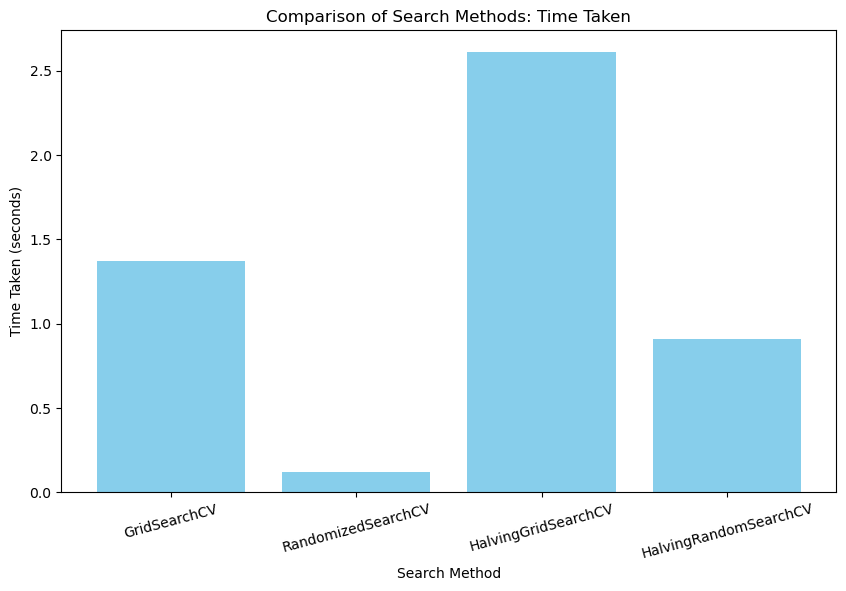

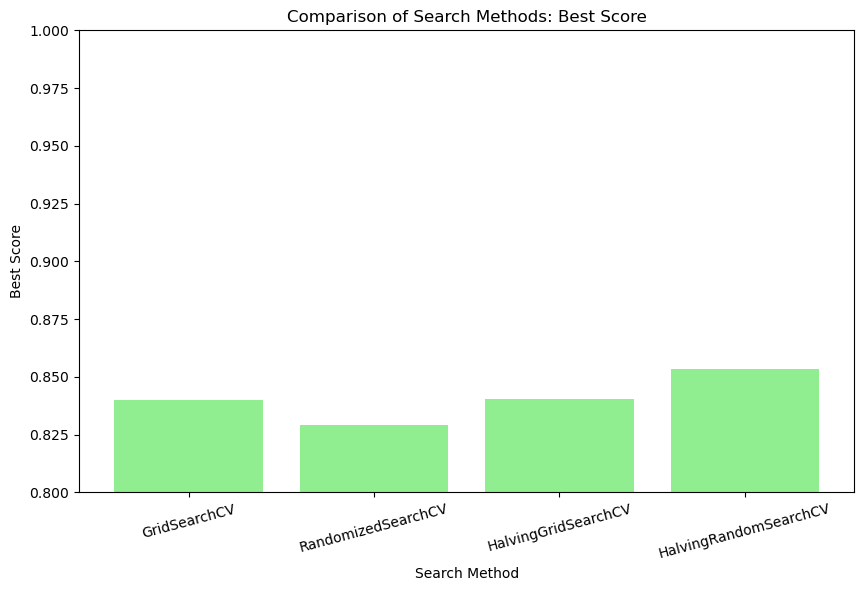

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
import matplotlib.pyplot as plt

# Enable HalvingGridSearchCV and HalvingRandomSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV

# Load the dataset
file_path = 'data/Whickham.txt'
data = pd.read_csv(file_path, sep=',')

# Encode categorical variables
label_encoder = LabelEncoder()
data['outcome'] = label_encoder.fit_transform(data['outcome'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])

# Split the data into features (X) and labels (y)
X = data[['smoker', 'age']]
y = data['outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for search methods
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
start_time = time.time()
grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search_time = time.time() - start_time
grid_search_score = grid_search.best_score_

# Perform Randomized Search
start_time = time.time()
random_search = RandomizedSearchCV(dt, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
random_search_time = time.time() - start_time
random_search_score = random_search.best_score_

# Perform Halving Grid Search
start_time = time.time()
halving_grid_search = HalvingGridSearchCV(dt, param_grid, cv=5, n_jobs=-1)
halving_grid_search.fit(X_train, y_train)
halving_grid_search_time = time.time() - start_time
halving_grid_search_score = halving_grid_search.best_score_

# Perform Halving Randomized Search (without n_iter)
start_time = time.time()
halving_random_search = HalvingRandomSearchCV(dt, param_distributions=param_grid, cv=5, n_jobs=-1, random_state=42)
halving_random_search.fit(X_train, y_train)
halving_random_search_time = time.time() - start_time
halving_random_search_score = halving_random_search.best_score_

# Collecting the results for comparison
results = {
    'Search Method': ['GridSearchCV', 'RandomizedSearchCV', 'HalvingGridSearchCV', 'HalvingRandomSearchCV'],
    'Best Score': [grid_search_score, random_search_score, halving_grid_search_score, halving_random_search_score],
    'Time Taken (seconds)': [grid_search_time, random_search_time, halving_grid_search_time, halving_random_search_time]
}

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plot the time taken by each search method
plt.figure(figsize=(10, 6))
plt.bar(results_df['Search Method'], results_df['Time Taken (seconds)'], color='skyblue')
plt.title('Comparison of Search Methods: Time Taken')
plt.ylabel('Time Taken (seconds)')
plt.xlabel('Search Method')
plt.xticks(rotation=15)
plt.show()

# Plot the best scores achieved by each search method
plt.figure(figsize=(10, 6))
plt.bar(results_df['Search Method'], results_df['Best Score'], color='lightgreen')
plt.title('Comparison of Search Methods: Best Score')
plt.ylabel('Best Score')
plt.xlabel('Search Method')
plt.xticks(rotation=15)
plt.ylim(0.8, 1)  # Adjust y-axis to highlight differences
plt.show()

